<a href="https://colab.research.google.com/github/god05212/Deep-Learning/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 사용한 데이터셋
> Chest X-Ray Images (Pneumonia)

- Paul Mooney
- https://www.kaggle.com/paultimothymooney
- https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
- Data: https://data.mendeley.com/datasets/rscbjbr9sj/2
- License: CC BY 4.0
- Citation: http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

# 1.LOADING DATA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip -uq "/content/drive/MyDrive/archive.zip" -d "/content/drive/MyDrive"

In [19]:
from pathlib import Path
# 데이터 directory의 경로를 정의합니다.
dir_alldata = Path('/content/drive/MyDrive/chest_xray/chest_xray')

In [20]:
# train directory 경로
train_data_dir = dir_alldata / 'train'

# validation directory 경로
validation_data_dir = dir_alldata / 'val'

# test directory 경로
test_data_dir = dir_alldata / 'test'

# 일반 및 폐렴 하위 directory의 경로를 가져옵니다
normal_cases_train = train_data_dir / 'NORMAL'
pneumonia_cases_train = train_data_dir / 'PNEUMONIA'

In [21]:
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_width, img_height = 150,150
nb_train_sample =1000
nb_validation_samples =100

epochs = 50
batch_size = 20

if K.image_data_format()=="channels_first":
    input_shape =(3,img_width, img_height)
else:
    input_shape =(img_width, img_height,3)

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)



train_generator= train_datagen.flow_from_directory(train_data_dir, target_size =(150,150),batch_size=batch_size, class_mode="binary" )

validation_generator = validation_datagen.flow_from_directory(validation_data_dir, target_size = (150,150),batch_size=batch_size, class_mode="binary")
 
test_generator = test_datagen.flow_from_directory(test_data_dir, target_size = (150,150),batch_size=batch_size, class_mode="binary")

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# 2.DATA VISUALIZATION

> 시각화와 관련된 단계는 다음과 같습니다:  

> 랜덤 일반 사진을 플로팅합니다.  
무작위 폐렴 사진을 플로팅합니다.  
긍정 사례와 부정 사례의 수를 표시합니다.  

> 데이터 셋에서 세 개의 랜덤 일반 사진

Printing three Normal random images 
NORMAL2-IM-0360-0001.jpeg
NORMAL2-IM-0217-0001.jpeg
NORMAL2-IM-0333-0001.jpeg


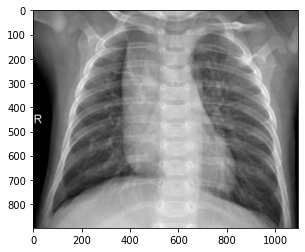

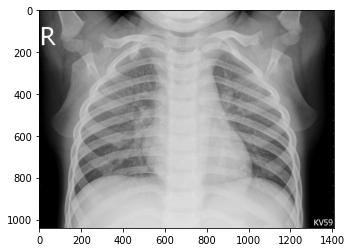

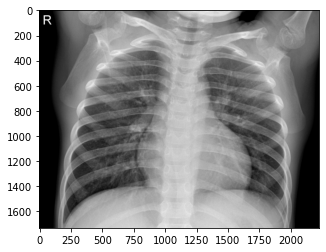

In [26]:
# 데이터 셋에서 세 개의 랜덤 일반 사진
import os, random
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
folder_N=r"/content/drive/MyDrive/chest_xray/test/NORMAL"

a=random.choice(os.listdir(folder_N))
b=random.choice(os.listdir(folder_N))
c=random.choice(os.listdir(folder_N))
print("Printing three Normal random images ")
print(a)
print(b)
print(c)

random_N = [a, b, c]

for i in random_N:
    file = folder_N+'/'+i
    img = image.load_img(file)
    plt.figure()
    plt.imshow(img)
    plt.show() 

> 데이터 셋에는 의료 전문가가 라벨을 붙입니다. 그것은 일반인이 해독할 수 없습니다. 하지만 횡격막 주변의 날카로움이 결정적인 요인이 될 수 있을 것 같습니다. 그럼에도 불구하고, 그 경우에도 예외가 있었습니다. 그래서 이 진단은 주관적인 문제입니다. Convnet에 맡겨서 알아보도록 하죠.

다음으로, 우리는 수업 횟수를 살펴볼 것입니다.